In [3]:
import warnings
warnings.filterwarnings("ignore")
import cv2
import numpy as np
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

In [29]:
def predict_image(image):
    """
    This function includes the entire pipeline, from data preprocessing to making final predictions.
    Input : Image
    Output: Predictions for the input Image
    """
    model = load_model("/content/drive/MyDrive/DenseNet121.hdf5")
    image = cv2.resize(image, (224,224), 3)
    image = image / 255
    image = np.expand_dims(image, axis=0)
    pred = model.predict(image)

    class_labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
    predicted_index = np.argmax(pred,axis=1)
    predicted_class_label = class_labels[predicted_index[0]]
    K.clear_session()
    return predicted_class_label



1/1 [==============================] - 3s 3s/step


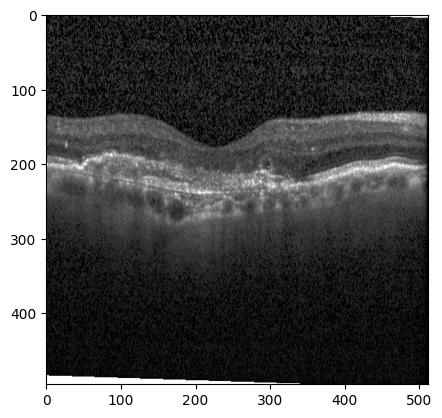

Actual Class Label   : CNV
Predicted Class Label: CNV
1/1 [==============================] - 3s 3s/step


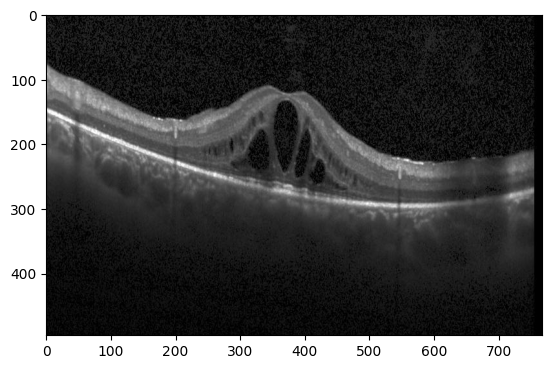

Actual Class Label   : DME
Predicted Class Label: DME
1/1 [==============================] - 3s 3s/step


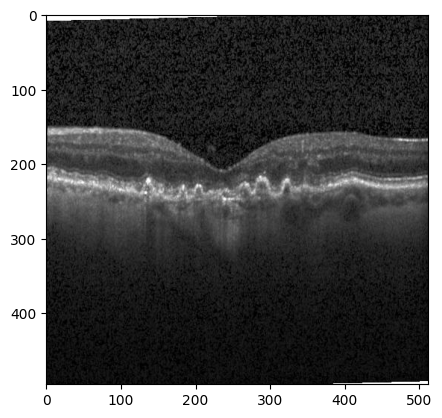

Actual Class Label   : DRUSEN
Predicted Class Label: DRUSEN
1/1 [==============================] - 3s 3s/step


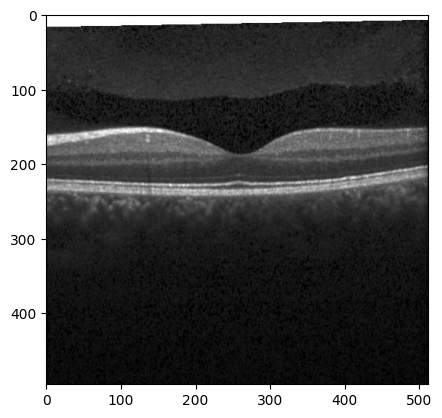

Actual Class Label   : NORMAL
Predicted Class Label: NORMAL


In [35]:
# For a single image (CNV)
image = cv2.imread("/content/drive/MyDrive/Images/test/CNV/CNV-1016042-1.jpeg")
pred = predict_image(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : CNV")
print("Predicted Class Label:", pred)

# For a single image (DME)
image = cv2.imread("/content/drive/MyDrive/Images/test/DME/DME-1102486-1.jpeg")
pred = predict_image(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : DME")
print("Predicted Class Label:", pred)

# For a single image (DRUSEN)
image = cv2.imread("/content/drive/MyDrive/Images/test/DRUSEN/DRUSEN-1173253-1.jpeg")
pred = predict_image(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : DRUSEN")
print("Predicted Class Label:", pred)


# For a single image (NORMAL)
image = cv2.imread("/content/drive/MyDrive/Images/test/NORMAL/NORMAL-101880-1.jpeg")
pred = predict_image(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : NORMAL")
print("Predicted Class Label:", pred)


In [43]:
def predict_directory(path):
    """
    This function includes entire pipeline, from data preprocessing to making final predictions.
    Input : test dataset folder
    Output: metric value that we are judging our model on
    """
    model = load_model("/content/drive/MyDrive/DenseNet121.hdf5")
    datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_generator = datagen.flow_from_directory(
      path,
      target_size = (224, 224),
      batch_size=128,
      class_mode = "categorical",
      shuffle = False)
    test_samples = 968
    batch_size = 128

    result = model.evaluate(test_generator, steps = test_samples // batch_size+1, verbose = 1)

    y_pred = model.predict(test_generator, test_samples // batch_size+1)
    predicted_values = np.argmax(y_pred, axis=1)

    confusionmatrix = confusion_matrix(test_generator.classes,predicted_values)
    plt.title("Plot Confusion Matrix")
    sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt='g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    return result

Found 968 images belonging to 4 classes.
8/8 [==============================] - 218s 26s/step - loss: 0.0765 - accuracy: 0.9783


8/8 [==============================] - 213s 26s/step


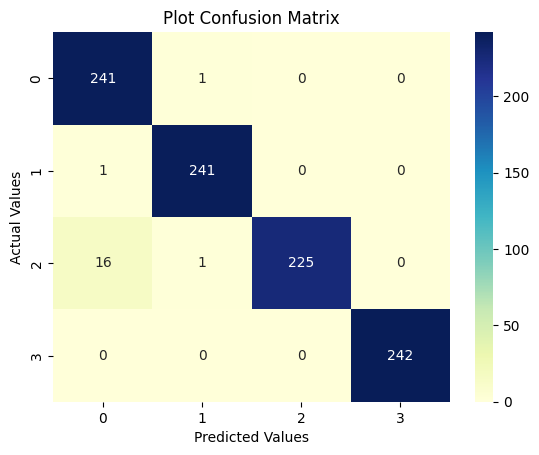

[0.07652509957551956, 0.9783057570457458]

In [44]:
predict_directory("OCT2017 /test")

In [2]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
x.add_row(['3CNN (without Image Augmentation)', '0.9355', '0.8916', '0.9277'])
x.add_row(['3CNN (with Image Augmentation)', '0.9121', '0.7046', '0.6560'])
x.add_row(['7CNN (with Image Augmentation)', '0.9636', '0.8816', '0.9638'])
x.add_row(['VGG16 Transfer Learning (with Image Augmentation)', '0.8886', '0.8876', '0.9039'])
x.add_row(['ResNet50 Transfer Learning (with Image Augmentation)','0.9171', '0.93663', '0.9618'])
x.add_row(['DenseNet121 Transfer Learning (with Image Augmentation)', '0.9479', '0.9342', '0.9845'])
print(x)

+---------------------------------------------------------+----------------+---------------------+---------------+
|                        Model Name                       | Train Accuracy | Validation Accuracy | Test Accuracy |
+---------------------------------------------------------+----------------+---------------------+---------------+
|            3CNN (without Image Augmentation)            |     0.9355     |        0.8916       |     0.9277    |
|              3CNN (with Image Augmentation)             |     0.9121     |        0.7046       |     0.6560    |
|              7CNN (with Image Augmentation)             |     0.9636     |        0.8816       |     0.9638    |
|    VGG16 Transfer Learning (with Image Augmentation)    |     0.8886     |        0.8876       |     0.9039    |
|   ResNet50 Transfer Learning (with Image Augmentation)  |     0.9171     |       0.93663       |     0.9618    |
| DenseNet121 Transfer Learning (with Image Augmentation) |     0.9479     |    

### Observations:

DenseNet121 Transfer Learning (with Image Augmentation) outperforms the other five models. DenseNet121 Transfer Learning has the highest accuracy score (0.9845) on test data.